# 

In [1]:
!pip install wordcloud matplotlib

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
#list of possible encodings to try
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='spam.csv' #change this to the path of your csv file
#Attempt to read the CSV fille with different encodings
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding:{encodings}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding:{encoding}")
        continue
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempt failed.unable to read the CSV file.")   

failed to read with encoding:utf-8
file successfully read with encoding:['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
CSV file has been successfully loaded.


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5106,ham,Ding me on ya break fassyole! Blacko from londn,NaN,NaN,NaN
180,ham,You lifted my hopes with the offer of money. I...,NaN,NaN,NaN
2326,ham,The Xmas story is peace.. The Xmas msg is love...,NaN,NaN,NaN
949,ham,Is that what time you want me to come?,NaN,NaN,NaN
5051,ham,"Tick, tick, tick .... Where are you ? I could ...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2752,ham,Sat right? Okay thanks...
1774,ham,"Its ok chikku, and its my 1 of favourite song...."
4193,ham,Can not use foreign stamps in this country.
3486,ham,Change windows logoff sound..
1378,ham,"Ya tel, wats ur problem.."


In [10]:
#Renaminf the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4738,ham,We have pizza if u want
4484,ham,What not under standing.
724,ham,The world is running and i am still.maybe all ...
141,ham,"Sir, Waiting for your mail."
5372,ham,"Ok., is any problem to u frm him? Wats matter?"


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate value
df.duplicated().sum()

403

In [16]:
#remove duplicate value
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
#EDA
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

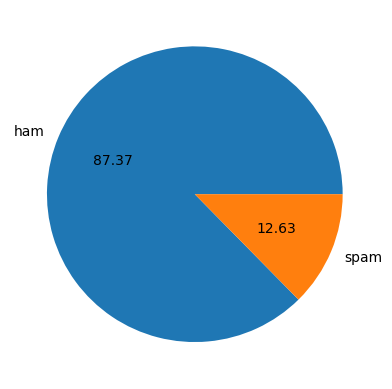

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentence']=df['text'].apply (lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#targeting num
df[df['target']==0 ][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#targeting spam
df[df['target']==1 ][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

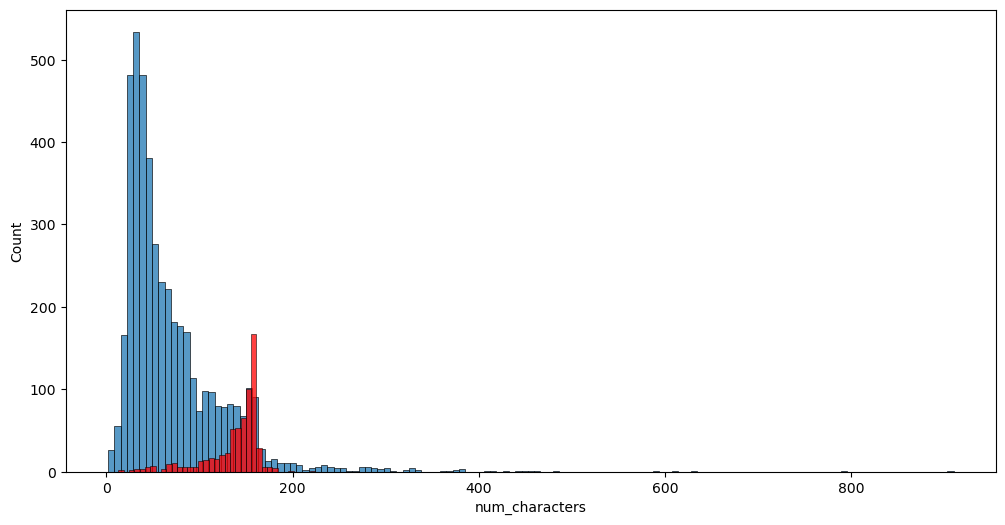

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

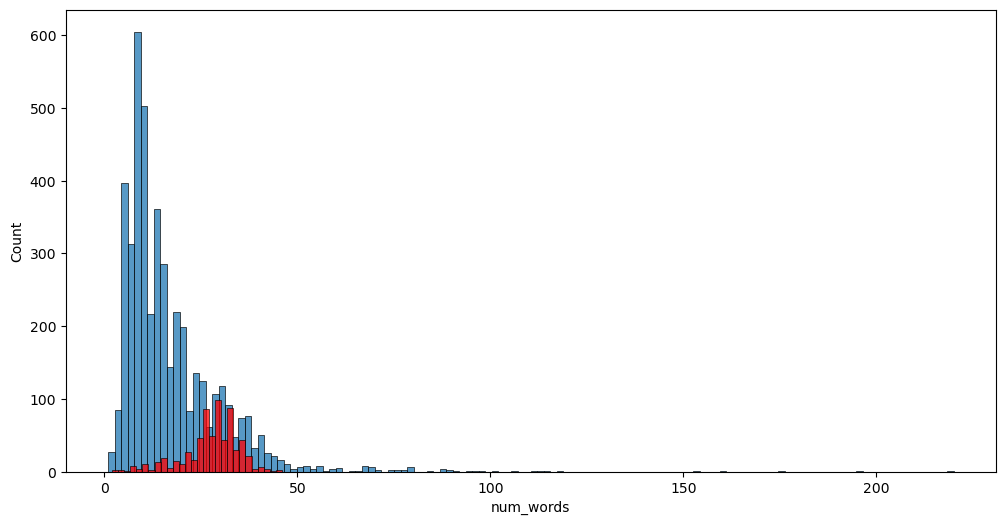

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color='red')

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


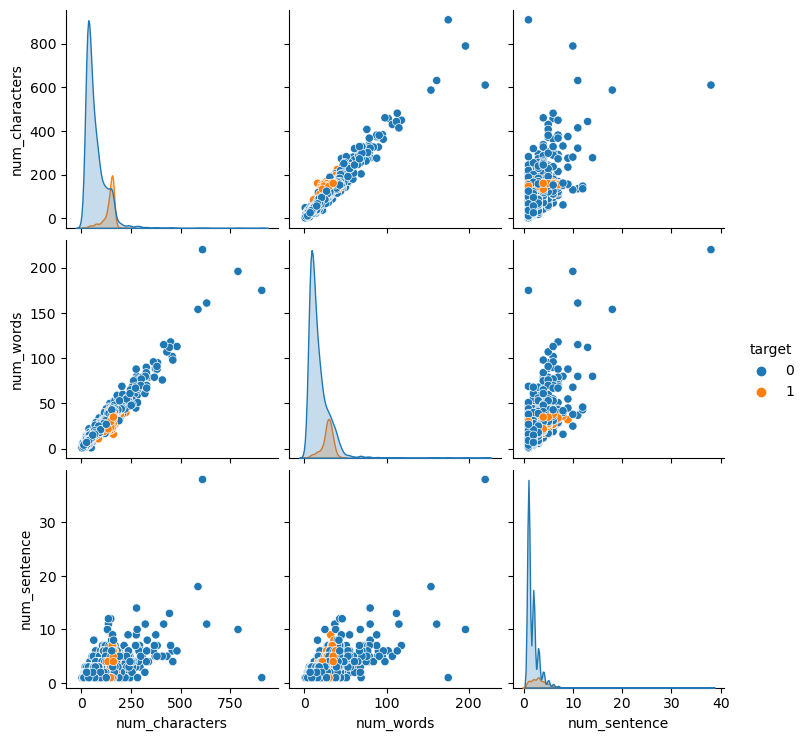

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

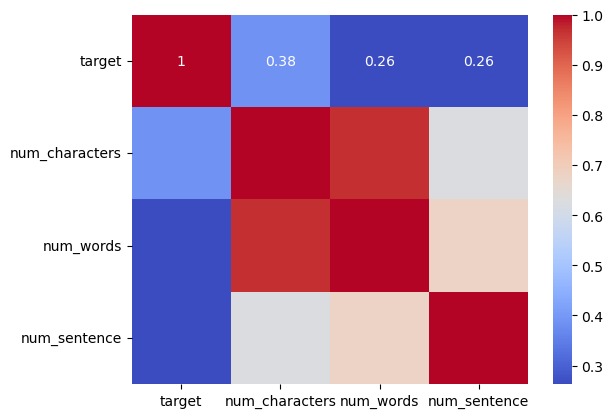

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Drop rows and columns with NaN values
df_numeric = df_numeric.dropna()

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [39]:
# Data preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')  # Download the tokenizer data

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  # Corrected from islnum to isalnum
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Perform stemming
    for i in text:
        y.append(ps.stem(i))
    
    # Return the transformed text as a single string
    return " ".join(y)

# Example usage
transformed_text = transform_text("I am gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today")
print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
from nltk.stem. porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [42]:
df['transformed_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

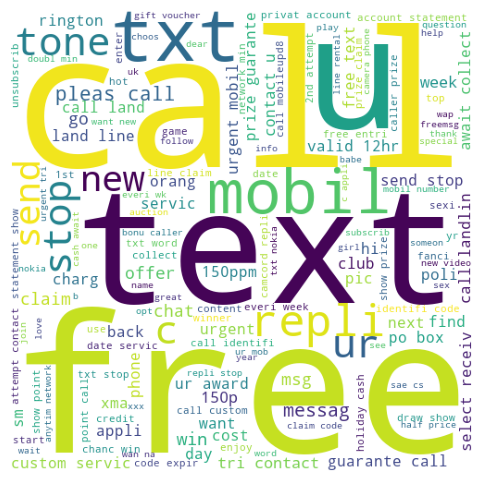

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [48]:
ham_wc= wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

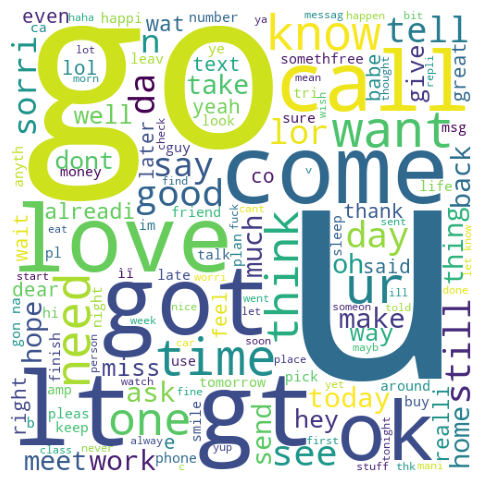

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


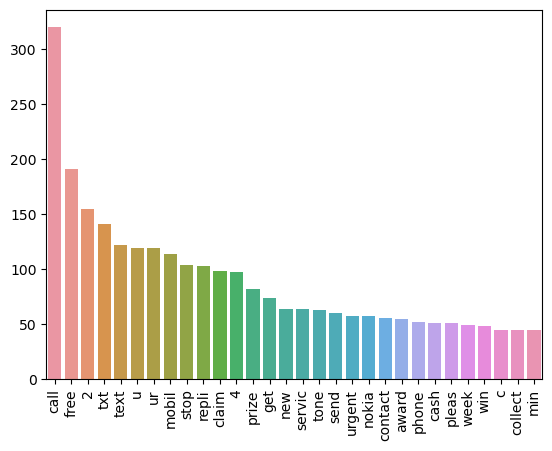

In [53]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is defined somewhere
counter = Counter(spam_corpus).most_common(30)
sns.barplot(x=[x[0] for x in counter], y=[x[1] for x in counter])
plt.xticks(rotation='vertical')
plt.show()


In [54]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

C:\Users\ruben\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


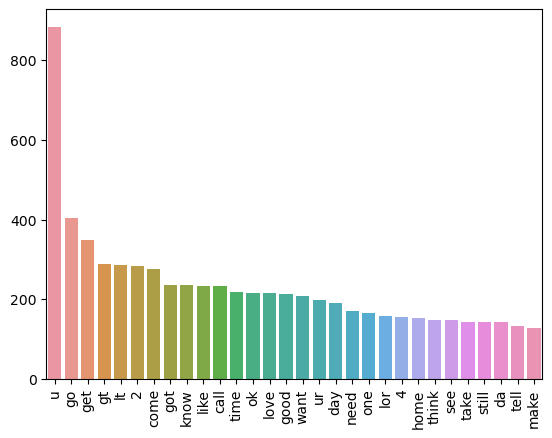

In [56]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is defined somewhere
counter = Counter(ham_corpus).most_common(30)
sns.barplot(x=[x[0] for x in counter], y=[x[1] for x in counter])
plt.xticks(rotation='vertical')
plt.show()


In [57]:
#Tesr Vectorization
#usibg bag of word
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
!pip install scikit-learn

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)



In [61]:
X = tfid.fit_transform(df['transformed_text']).toarray()


In [62]:
X.shape

(5169, 3000)

In [63]:
y=df['target'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb=GaussianNB
mnb=MultinomialNB
bnb=BernoulliNB

In [68]:
gnb = GaussianNB()  # Define the Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)  # Train the model

y_pred1 = gnb.predict(X_test)  # Make predictions

print(accuracy_score(y_test, y_pred1))  # Print accuracy
print(confusion_matrix(y_test, y_pred1))  # Print confusion matrix
print(precision_score(y_test, y_pred1))  # Print precision score



0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb = MultinomialNB()  # Define the Gaussian Naive Bayes classifier
mnb.fit(X_train, y_train)  # Train the model

y_pred2 = mnb.predict(X_test)  # Make predictions

print(accuracy_score(y_test, y_pred2))  # Print accuracy
print(confusion_matrix(y_test, y_pred2))  # Print confusion matrix
print(precision_score(y_test, y_pred2))  # Print precision score



0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
bnb = BernoulliNB()  # Define the Gaussian Naive Bayes classifier
bnb.fit(X_train, y_train)  # Train the model

y_pred3 = bnb.predict(X_test)  # Make predictions

print(accuracy_score(y_test, y_pred3))  # Print accuracy
print(confusion_matrix(y_test, y_pred3))  # Print confusion matrix
print(precision_score(y_test, y_pred3))  # Print precision score



0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [71]:
!pip install xgboost

In [72]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    GradientBoostingClassifier
)
import xgboost as xgb

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = xgb.XGBClassifier(n_estimators=50, random_state=2)




In [73]:
clfs={
    'SVC' : svc,
    'KN ': knc,
    'NB ': mnb,
    'DT ': dtc,
    'LR' :lrc,
    
    'AdaBoost' :  abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [76]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    if callable(train_classifier):  # Check if train_classifier is callable
        try:
            results = train_classifier(clf, X_train, y_train, X_test, y_test)
            if len(results) == 2:  # Check if train_classifier returns two values
                current_accuracy, current_precision = results
                print(f"For {name}:")
                print(f"Accuracy - {current_accuracy:.3f}")
                print(f"Precision - {current_precision:.3f}")
                print()  # Empty line for better readability
                accuracy_scores.append(current_accuracy)
                precision_scores.append(current_precision)
            else:
                print(f"Error: train_classifier returned {len(results)} values, expected 2.")
        except Exception as e:
            print(f"An error occurred: {e}")
    else:
        print("Error: train_classifier is not callable.")



For SVC:
Accuracy - 0.976
Precision - 0.975

For KN :
Accuracy - 0.905
Precision - 1.000

For NB :
Accuracy - 0.971
Precision - 1.000

For DT :
Accuracy - 0.930
Precision - 0.817

For LR:
Accuracy - 0.958
Precision - 0.970

For AdaBoost:
Accuracy - 0.960
Precision - 0.929

For Bgc:
Accuracy - 0.958
Precision - 0.868

For ETC:
Accuracy - 0.975
Precision - 0.975

For GBDT:
Accuracy - 0.947
Precision - 0.919

For xgb:
Accuracy - 0.967
Precision - 0.926



In [77]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)



In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,Bgc,0.958414,0.868217
3,DT,0.930368,0.817308


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,Bgc,Accuracy,0.958414
9,DT,Accuracy,0.930368


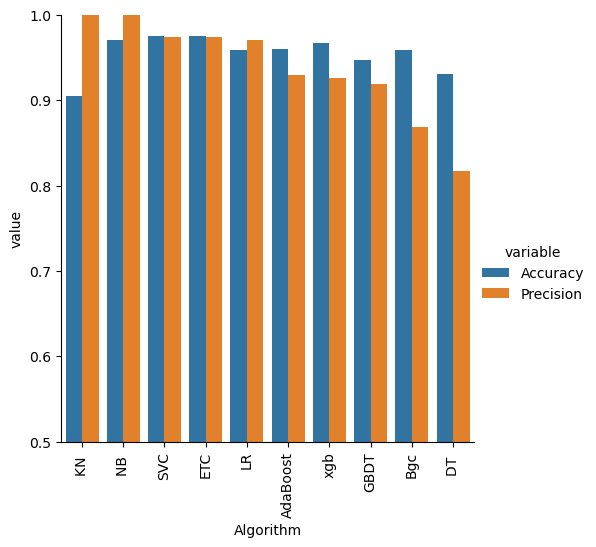

In [83]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
#model improve
#1. change the max_features parameter of tfidf

In [87]:
tem_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()), 
    'Accuracy_max_ft_300': accuracy_scores, 
    'Precision_max_ft_300': precision_scores
}).sort_values('Precision_max_ft_300', ascending=False)

In [88]:
new_df = performance_df.merge(tem_df,on='Algorithm')

In [89]:
new_df_scaled = new_df.merge(tem_df,on='Algorithm')

In [90]:
tem_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()), 
    'Accuracy_num_chars': accuracy_scores, 
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=False)

In [91]:
new_df_scaled.merge(tem_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_300_x,Precision_max_ft_300_x,Accuracy_max_ft_300_y,Precision_max_ft_300_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308


In [92]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb), ('et',etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [100]:
#Applying stacking
estimators=[('svm',svc), ('nb',mnb), ('et',etc)]
final_estimator=RandomForestClassifier()

In [101]:
from sklearn.ensemble import StackingClassifier

In [102]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [103]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.946969696969697


In [104]:

clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))



Accuracy: 0.9806576402321083
Precision: 0.9538461538461539


In [110]:

from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('svm', svc),
    ('nb', mnb),
    ('et', etc)
]

# Define the meta-model (final estimator)
final_estimator = RandomForestClassifier()

# Create the stacking ensemble
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the stacking ensemble's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9806576402321083
Precision: 0.946969696969697


In [114]:
!pip install pickle5

     ---------------------------------------- 0.0/132.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/132.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/132.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/132.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/132.1 kB ? eta -:--:--
     -------- ---------------------------- 30.7/132.1 kB 119.1 kB/s eta 0:00:01
     ----------------- ------------------- 61.4/132.1 kB 204.8 kB/s eta 0:00:01
     ------------------------------ ----- 112.6/132.1 kB 344.8 kB/s eta 0:00:01
     ------------------------------------ 132.1/132.1 kB 371.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-311\pickle5
  creating build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-311\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Mi

In [122]:



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Sample training data
X_train = ["This is a sample sentence", "Another sample sentence"]
y_train = [0, 1]  # Sample labels

# Define and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Define and train the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)

# Save the vectorizer and model using pickle
try:
    with open('vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    with open('model.pkl', 'wb') as f:
        pickle.dump(mnb_model, f)
except Exception as e:
    print(f"Error saving files: {e}")


In [ ]:
!pip install streamlit

In [1]:
import streamlit as st
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [ps.stem(word) for word in text]
    return " ".join(text)

# Load the TfidfVectorizer and the model
with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title("Email Spam Classifier")
input_sms = st.text_area("Enter the message")

if st.button("Predict"):
    try:
        # Preprocessing the input message
        transformed_sms = transform_text(input_sms)
        
        # Vectorize the preprocessed message with the correct number of features
        vector_input = tfidf.transform([transformed_sms])
        
        # Check if the number of features matches
        if vector_input.shape[1] != 8:
            # If not, pad the input with zeros to match the expected number of features
            padded_input = vector_input.toarray()[0]
            padded_input = np.pad(padded_input, (0, 8-vector_input.shape[1]), mode='constant')
            vector_input = padded_input.reshape(1, -1)
        else:
            vector_input = vector_input.toarray()
        
        # Predict
        result = model.predict(vector_input)[0]
        
        # Display the result
        if result == 1:
            st.header("Spam")
        else:
            st.header("Not Spam")
    except Exception as e:
        st.error(f"An error occurred: {e}")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-04 20:25:15.488 
  command:

    streamlit run C:\Users\ruben\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [1]:
!streamlit run app.py


Traceback (most recent call last):
  File "C:\Users\ruben\anaconda3\Scripts\streamlit-script.py", line 6, in <module>
    from streamlit.cli import main
ModuleNotFoundError: No module named 'streamlit.cli'
